In [1]:
# Re-import libraries due to kernel reset
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from matplotlib import animation
from IPython.display import HTML

In [11]:
# Variabel dari NIM: 202331206
a = 20
b = 23
c = 3
d = 12
e = 06

# Buat graf sesuai dengan gambar
G = nx.Graph()

# Menambahkan node
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
G.add_nodes_from(nodes)

# Menambahkan edges dan bobot sesuai dengan graf
edges = [
    ('A', 'B', a),
    ('B', 'C', b),
    ('A', 'D', c),
    ('B', 'D', d),
    ('B', 'E', abs(d - e)),
    ('C', 'E', abs(b - e)),
    ('D', 'E', abs(d + b)),
    ('D', 'F', e),
    ('E', 'F', abs(c + e)),
    ('E', 'G', abs(d - e - a)),
    ('F', 'G', abs(c - e))
]
G.add_weighted_edges_from(edges)

# Hitung Minimum Spanning Tree dengan Kruskal (default)
mst_kruskal = nx.minimum_spanning_tree(G, algorithm='kruskal')

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (1392113037.py, line 6)

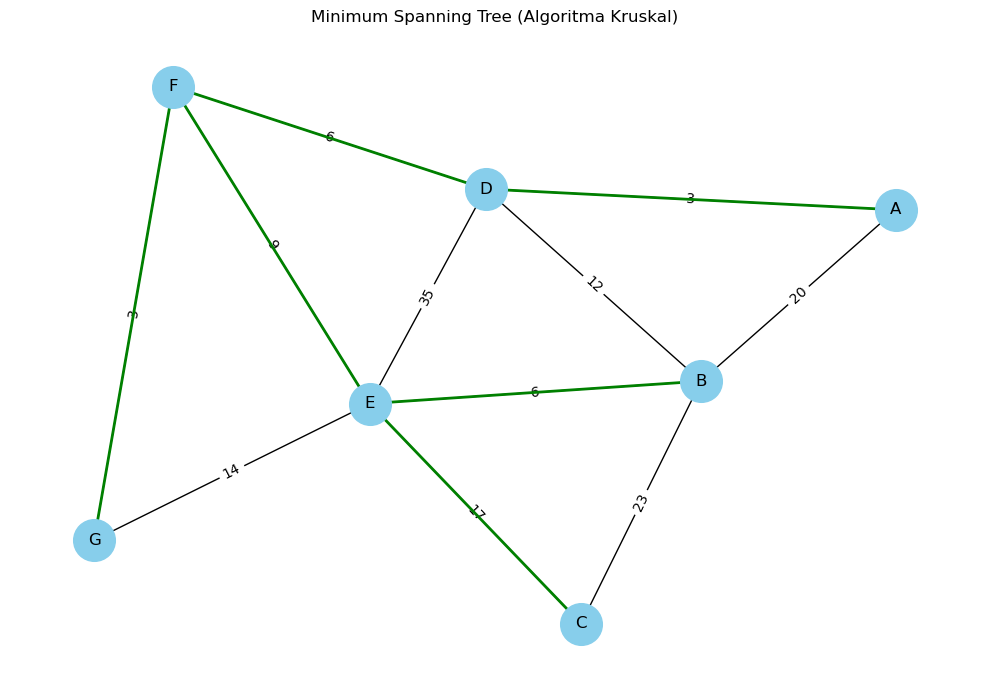

44

In [3]:
# Visualisasi
pos = nx.spring_layout(G, seed=42)
edge_labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(10, 7))
nx.draw_networkx(G, pos, node_color="skyblue", node_size=900, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw_networkx_edges(G, pos, edgelist=mst_kruskal.edges(), edge_color="green", width=2)
plt.title("Minimum Spanning Tree (Algoritma Kruskal)")
plt.axis('off')
plt.tight_layout()
plt.show()

# Total bobot MST
total_weight = sum([G[u][v]['weight'] for u, v in mst_kruskal.edges()])
total_weight

In [4]:
# Menambahkan edge ke graf
G.add_weighted_edges_from(edges)

# --- Minimum Spanning Tree: Prim ---
mst_prim = nx.minimum_spanning_tree(G, algorithm='prim')

# --- Dijkstra Shortest Path Tree dari simpul A ---
dijkstra_path = nx.single_source_dijkstra_path(G, source="A")
dijkstra_edges = []
for dest in dijkstra_path:
    path = dijkstra_path[dest]
    dijkstra_edges += list(zip(path[:-1], path[1:]))

# Ambil posisi tata letak graf
pos = nx.spring_layout(G, seed=42)

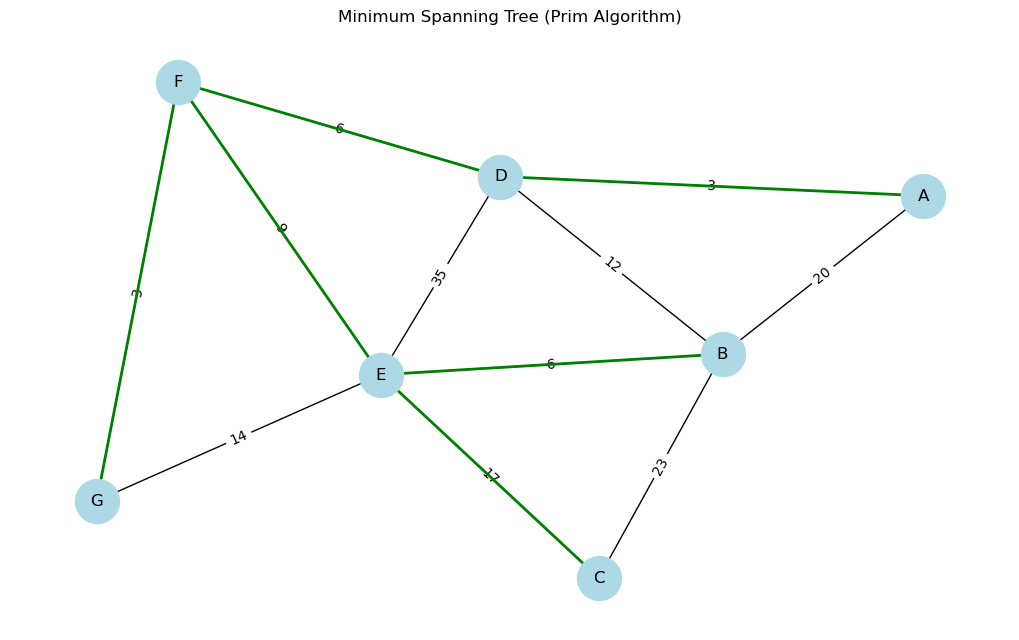

In [5]:
# Plot hasil Prim
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
nx.draw_networkx_edges(G, pos, edgelist=mst_prim.edges(), edge_color='green', width=2)
plt.title("Minimum Spanning Tree (Prim Algorithm)")
plt.axis('off')
plt.show()

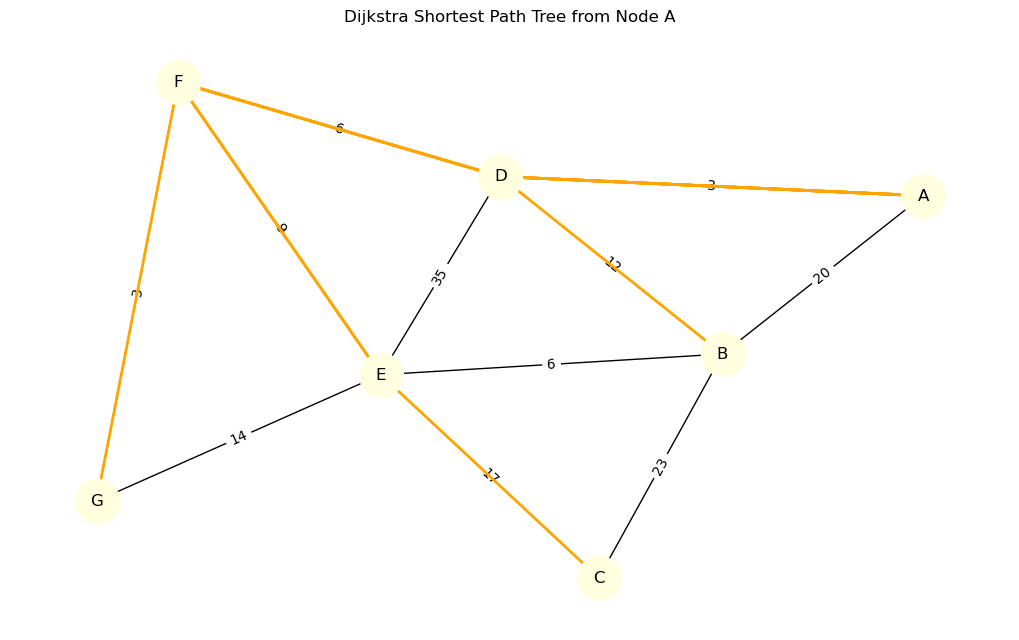

(44, 50)

In [6]:
# Plot hasil Dijkstra
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='lightyellow', node_size=1000)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
nx.draw_networkx_edges(G, pos, edgelist=dijkstra_edges, edge_color='orange', width=2)
plt.title("Dijkstra Shortest Path Tree from Node A")
plt.axis('off')
plt.show()

# Hitung bobot total MST dan Dijkstra
total_prim = sum(G[u][v]['weight'] for u, v in mst_prim.edges())
dijkstra_weight = sum(G[u][v]['weight'] for u, v in set(dijkstra_edges))

total_prim, dijkstra_weight

In [7]:
# Kruskal's Algorithm
kruskal_mst = list(nx.minimum_spanning_edges(G, algorithm='kruskal', data=True))
kruskal_total = sum([d['weight'] for (u, v, d) in kruskal_mst])
kruskal_list = [(u, v, d['weight']) for (u, v, d) in kruskal_mst]

# Boruvka's Algorithm (Sollin)
parent = {node: node for node in G.nodes()}
rank = {node: 0 for node in G.nodes()}

def find(u):
    if parent[u] != u:
        parent[u] = find(parent[u])
    return parent[u]

def union(u, v):
    ru, rv = find(u), find(v)
    if ru != rv:
        if rank[ru] < rank[rv]:
            parent[ru] = rv
        else:
            parent[rv] = ru
            if rank[ru] == rank[rv]:
                rank[ru] += 1

sol_edges = []
while len(set(find(node) for node in G.nodes())) > 1:
    cheapest = {}
    for u, v, d in G.edges(data=True):
        ru, rv = find(u), find(v)
        if ru != rv:
            if ru not in cheapest or d['weight'] < G[cheapest[ru][0]][cheapest[ru][1]]['weight']:
                cheapest[ru] = (u, v)
            if rv not in cheapest or d['weight'] < G[cheapest[rv][0]][cheapest[rv][1]]['weight']:
                cheapest[rv] = (u, v)
    for u, v in set(cheapest.values()):
        if find(u) != find(v):
            union(u, v)
            sol_edges.append((u, v, G[u][v]['weight']))

sol_total = sum(w for u, v, w in sol_edges)

In [8]:
# Tampilkan tabel hasil
df_result = pd.DataFrame({
    "Algoritma": ["Kruskal", "Sollin"],
    "Edges": [kruskal_list, sol_edges],
    "Total Bobot": [kruskal_total, sol_total]
})

print(df_result.to_string(index=False))

Algoritma                                                               Edges  Total Bobot
  Kruskal [(A, D, 3), (F, G, 3), (B, E, 6), (D, F, 6), (E, F, 9), (C, E, 17)]           44
   Sollin [(F, G, 3), (A, D, 3), (B, E, 6), (C, E, 17), (E, F, 9), (D, F, 6)]           44


NameError: name 'ax2' is not defined

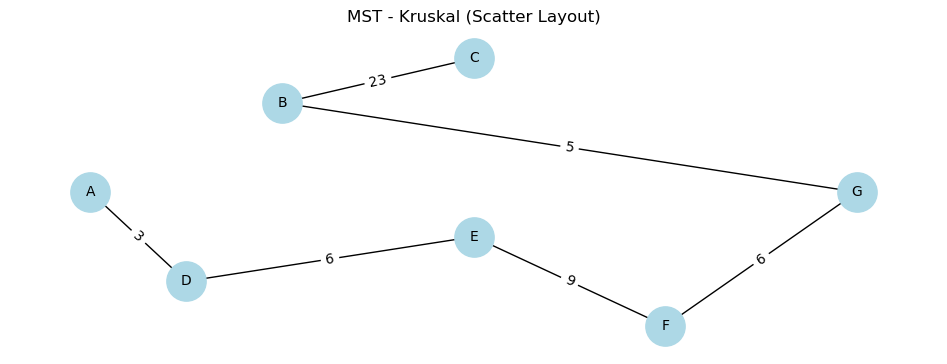

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd




# 1. Buat graf MST hasil algoritma (contoh: Kruskal dan Sollin)
edges_kruskal = [('A', 'D', 3), ('D', 'E', 6), ('E', 'F', 9), ('F', 'G', 6), ('G', 'B', 5), ('B', 'C', 23)]
edges_sollin = [('A', 'D', 3), ('D', 'E', 6), ('E', 'F', 9), ('F', 'G', 6), ('G', 'C', 3), ('C', 'B', 4)]

# Koordinat acak untuk tampilan node
coords = {
    'A': (2, 6), 'B': (4, 8), 'C': (6, 9),
    'D': (3, 4), 'E': (6, 5), 'F': (8, 3), 'G': (10, 6)
}

# Total Bobot
total_kruskal = sum(w for _, _, w in edges_kruskal)
total_sollin = sum(w for _, _, w in edges_sollin)

# --- Subplot Layout ---
fig = plt.figure(constrained_layout=True, figsize=(14, 10))
gs = fig.add_gridspec(3, 3)

# 1. Scatter Plot MST (Kruskal)
ax1 = fig.add_subplot(gs[0, :2])
G1 = nx.Graph()
G1.add_weighted_edges_from(edges_kruskal)
pos = coords
nx.draw(G1, pos, ax=ax1, with_labels=True, node_color='lightblue', node_size=800, font_size=10)
nx.draw_networkx_edge_labels(G1, pos, ax=ax1, edge_labels={(u, v): w for u, v, w in edges_kruskal})
ax1.set_title("MST - Kruskal (Scatter Layout)")


# 2. Buat DataFrame dari total bobot
df_bobot = pd.DataFrame({
    "Algoritma": ["Kruskal", "Sollin"],
    "Total Bobot": [total_kruskal, total_sollin]
})

# Barplot dengan hue = Algoritma dan legend dimatikan
sns.barplot(data=df_bobot, x="Algoritma", y="Total Bobot", hue="Algoritma", palette="viridis", ax=ax2, legend=False)


# 3. Pie Chart (Distribusi Edge Kruskal)
ax3 = fig.add_subplot(gs[1, 0])
edge_labels = [f"{u}-{v}" for u, v, _ in edges_kruskal]
weights = [w for _, _, w in edges_kruskal]
ax3.pie(weights, labels=edge_labels, autopct='%1.1f%%', startangle=140)
ax3.set_title("Distribusi Bobot Edge (Kruskal)")

# 4. Pie Chart (Distribusi Edge Sollin)
ax4 = fig.add_subplot(gs[1, 1])
edge_labels2 = [f"{u}-{v}" for u, v, _ in edges_sollin]
weights2 = [w for _, _, w in edges_sollin]
ax4.pie(weights2, labels=edge_labels2, autopct='%1.1f%%', startangle=140)
ax4.set_title("Distribusi Bobot Edge (Sollin)")

# 5. Histogram (Gabungan MST Edge Weight)
ax5 = fig.add_subplot(gs[1:, 2])
all_weights = weights + weights2
ax5.hist(all_weights, bins=range(min(all_weights), max(all_weights) + 5, 3), color='coral', edgecolor='black')
ax5.set_title("Histogram Distribusi Bobot Edge")
ax5.set_xlabel("Bobot")
ax5.set_ylabel("Frekuensi")

# 6. MST - Sollin (Scatter Layout)
ax6 = fig.add_subplot(gs[2, :2])
G2 = nx.Graph()
G2.add_weighted_edges_from(edges_sollin)
nx.draw(G2, pos, ax=ax6, with_labels=True, node_color='lightgreen', node_size=800, font_size=10)
nx.draw_networkx_edge_labels(G2, pos, ax=ax6, edge_labels={(u, v): w for u, v, w in edges_sollin})
ax6.set_title("MST - Sollin (Scatter Layout)")

plt.suptitle("Visualisasi Minimum Spanning Tree (MST)", fontsize=16)
plt.show()


In [10]:
from matplotlib import animation
from IPython.display import HTML

def animate_mst_building(G, mst_edges, pos, title="Animasi Proses MST (Kruskal)"):
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Gambar semua node terlebih dahulu
    nx.draw_networkx_nodes(G, pos, ax=ax, node_color='skyblue', node_size=800)
    nx.draw_networkx_labels(G, pos, ax=ax)
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color='lightgray', style='dotted')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)
    ax.set_title(title)
    ax.axis('off')
    
    lines = []

    def init():
        return lines

    def update(i):
        ax.clear()
        nx.draw_networkx_nodes(G, pos, ax=ax, node_color='skyblue', node_size=800)
        nx.draw_networkx_labels(G, pos, ax=ax)
        nx.draw_networkx_edges(G, pos, ax=ax, edge_color='lightgray', style='dotted')
        nx.draw_networkx_edges(G, pos, edgelist=mst_edges[:i+1], edge_color='green', width=3)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)
        ax.set_title(title + f"\nEdge ke-{i+1}")
        ax.axis('off')
        return lines

    ani = animation.FuncAnimation(fig, update, frames=len(mst_edges), init_func=init,
                                  interval=1000, blit=False, repeat=False)
    plt.close(fig)
    return HTML(ani.to_jshtml())


In [ ]:
# 4. Pie Chart (Distribusi Edge Sollin)
ax4 = fig.add_subplot(gs[1, 1])
edge_labels2 = [f"{u}-{v}" for u, v, _ in edges_sollin]
weights2 = [w for _, _, w in edges_sollin]
ax4.pie(weights2, labels=edge_labels2, autopct='%1.1f%%', startangle=140)
ax4.set_title("Distribusi Bobot Edge (Sollin)")

In [ ]:
# 5. Histogram (Gabungan MST Edge Weight)
ax5 = fig.add_subplot(gs[1:, 2])
all_weights = weights + weights2
ax5.hist(all_weights, bins=range(min(all_weights), max(all_weights) + 5, 3), color='coral', edgecolor='black')
ax5.set_title("Histogram Distribusi Bobot Edge")
ax5.set_xlabel("Bobot")
ax5.set_ylabel("Frekuensi")

In [ ]:
# 6. MST - Sollin (Scatter Layout)
ax6 = fig.add_subplot(gs[2, :2])
G2 = nx.Graph()
G2.add_weighted_edges_from(edges_sollin)
nx.draw(G2, pos, ax=ax6, with_labels=True, node_color='lightgreen', node_size=800, font_size=10)
nx.draw_networkx_edge_labels(G2, pos, ax=ax6, edge_labels={(u, v): w for u, v, w in edges_sollin})
ax6.set_title("MST - Sollin (Scatter Layout)")

plt.suptitle("Visualisasi Minimum Spanning Tree (MST)", fontsize=16)
plt.show()